Accuracy: 89.51534509095958
Precision: %f 99.58592132505176
Recall: %f 65.83029197080292
F1 score: %f 0.7926393847844
Cohens kappa: %f 0.7263345065858603
ROC AUC: %f 0.8285525379135076
Confusion Matrix [[10006    12]
 [ 1498  2886]]
Mean Absolute Error 0.10484654909040411
Root Mean Squared Error 0.3238001684533288


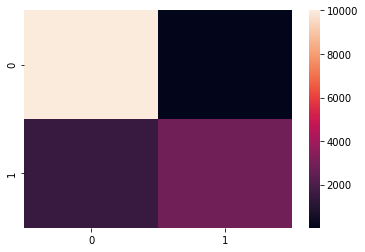

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
d=pd.read_csv("/content/Dataset_KPCA.csv")
dataset=d.to_numpy()
# split into input (X) and output (Y) variables
X = dataset[:,0:5]
Y = dataset[:,5]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, shuffle=True)
from sklearn.neural_network import MLPClassifier
for a in range(100):
    b=a+1
    mlp = MLPClassifier(hidden_layer_sizes=b,solver='adam',learning_rate_init=0.1,max_iter=400)
     #Train the model
    Y_pred = mlp.fit(X_train, Y_train).predict(X_test)
     #Test the model
    #a=mlp.score(X_test,Y_test)
    #if a>0.7:
        #print (np.mean(a))
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, Y_pred)
print('Accuracy:' ,accuracy*100)
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_pred)
print('Precision: %f', precision*100)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_pred)
print('Recall: %f', recall*100)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, Y_pred)
print('F1 score: %f',f1)
 # kappa
kappa = cohen_kappa_score(Y_test, Y_pred)
print('Cohens kappa: %f', kappa)
# ROC AUC
auc_1 = roc_auc_score(Y_test, Y_pred)
print('ROC AUC: %f', auc_1)
# confusion matrix
matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix' , matrix)
# MAE
mae = mean_absolute_error(Y_test, Y_pred)
print('Mean Absolute Error', mae)
#RMSE
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error', rmse)
#Plot of the Confusion Matrix
ax = sns.heatmap(matrix)


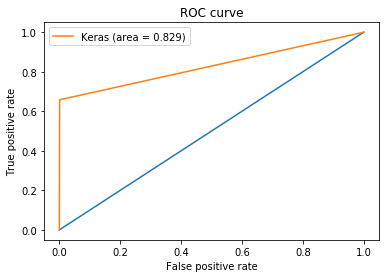

In [4]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, Y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1])
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()        